In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.shape                 

(8807, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)
df['director'].fillna('Not Specified', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

## 1. How many total titles are there on Netflix?

In [9]:
df.shape

(8807, 14)

#### So, There are 8807 titles on Netflix.

## 2. How many are Movies vs TV Shows?

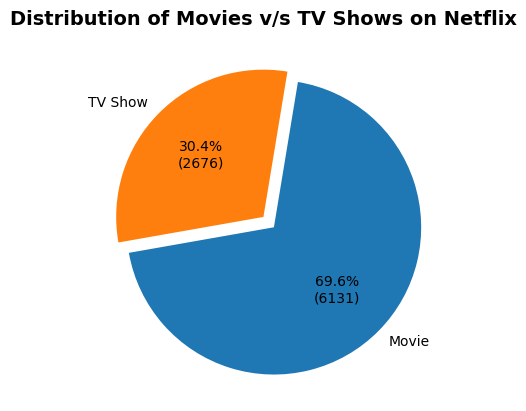

In [10]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return my_format

data = df['type'].value_counts()

explode = [0.1, 0]

plt.figure(figsize=(4,6))
plt.pie(data, labels=data.index, startangle=190, autopct=autopct_format(data), explode=explode)
plt.title("Distribution of Movies v/s TV Shows on Netflix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. What is the oldest and most recent content on Netflix (based on release year)?

In [11]:
oldest = df[df['release_year'] == df['release_year'].min()][['title', 'type', 'country', 'release_year']]
newest = df[df['release_year'] == df['release_year'].max()][['title', 'type', 'country', 'release_year']].head(5)

print("🎬 Oldest Content:")
display(oldest)

print("\n🆕 Newest Content:")
display(newest)

🎬 Oldest Content:


,title,type,country,release_year
4250,Pioneers: First Women Filmmakers*,TV Show,Unknown,1925



🆕 Newest Content:


,title,type,country,release_year
1,Blood & Water,TV Show,South Africa,2021
2,Ganglands,TV Show,Unknown,2021
3,Jailbirds New Orleans,TV Show,Unknown,2021
4,Kota Factory,TV Show,India,2021
5,Midnight Mass,TV Show,Unknown,2021


## 4. Which year had the highest number of content additions on Netflix?

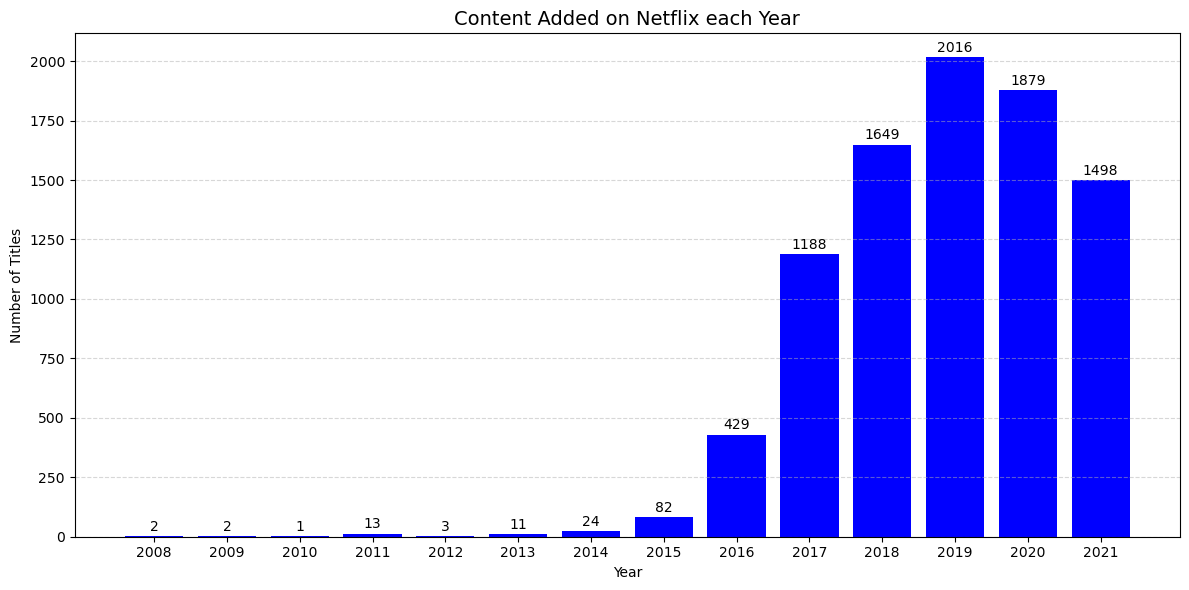

In [12]:
counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
bars = plt.bar(counts.index, counts.values, color='blue', alpha=1)

plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Content Added on Netflix each Year", fontsize=14)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)
    
plt.xticks(counts.index, rotation=0)
plt.tight_layout()
plt.show()

## 5. Which month sees the most content added to Netflix?

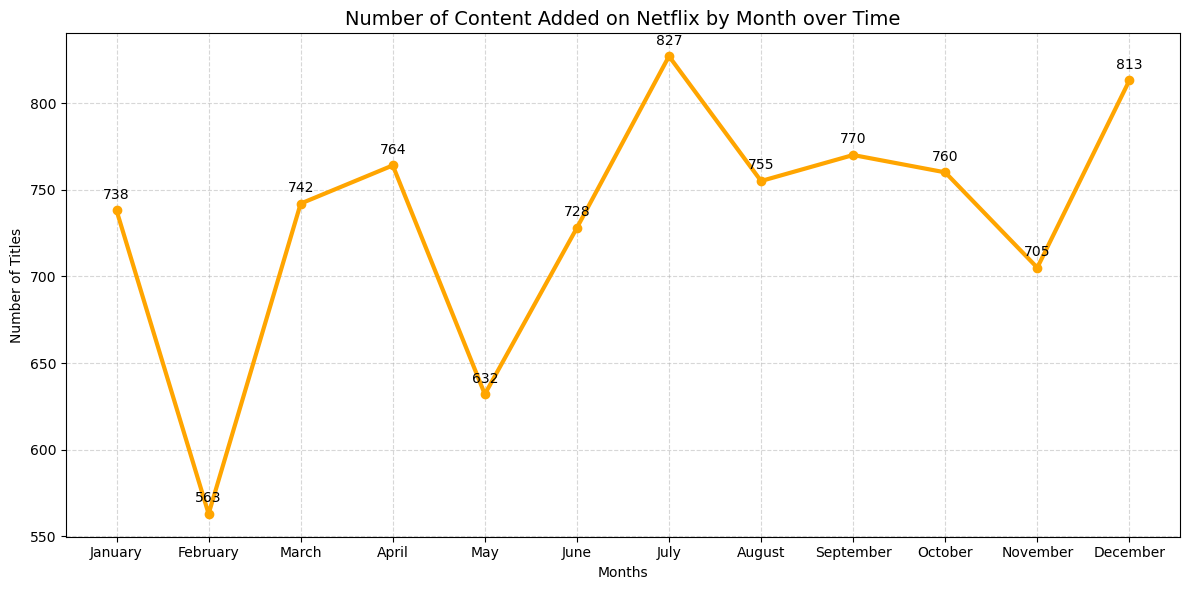

In [13]:
counts = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.5)

plt.plot(counts.index, counts.values, marker='o', color='orange', linewidth=3)

for i, yval in enumerate(counts.values):
    plt.text(i, yval + 5, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel("Months")
plt.ylabel("Number of Titles")
plt.title("Number of Content Added on Netflix by Month over Time", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 6. Which countries produce the most Netflix content?

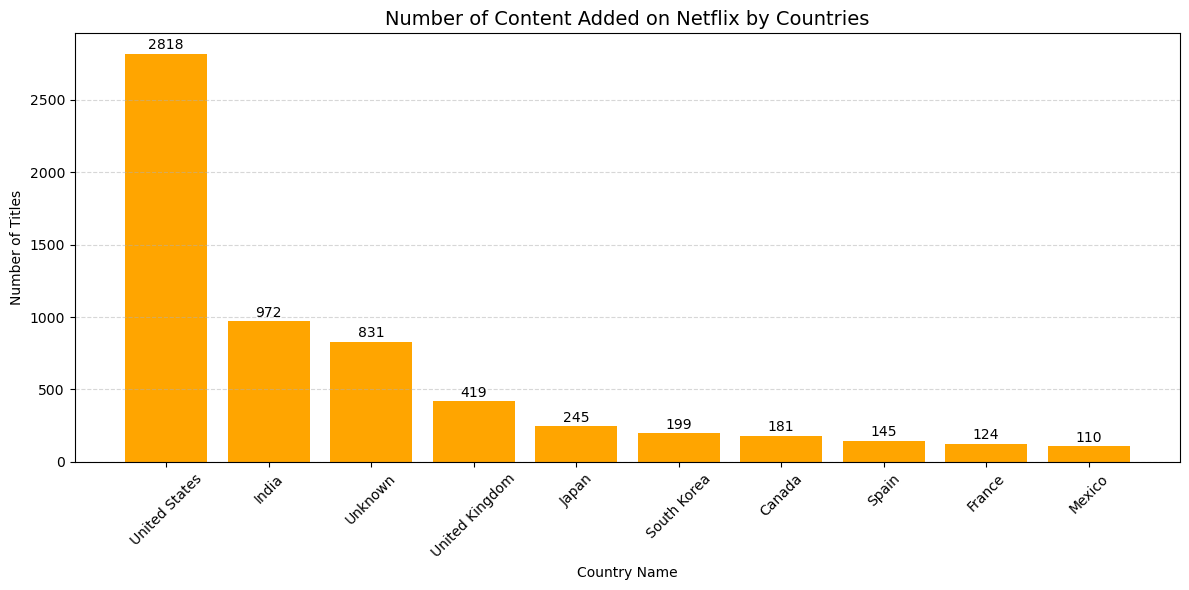

In [14]:
counts = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
bars = plt.bar(counts.index, counts.values, color='orange', alpha=1)

plt.xlabel("Country Name")
plt.ylabel("Number of Titles")
plt.title("Number of Content Added on Netflix by Countries", fontsize=14)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)
    
plt.xticks(counts.index, rotation=45)
plt.tight_layout()
plt.show()

## 7. What is the distribution of content by country and type (Movie vs TV Show)?

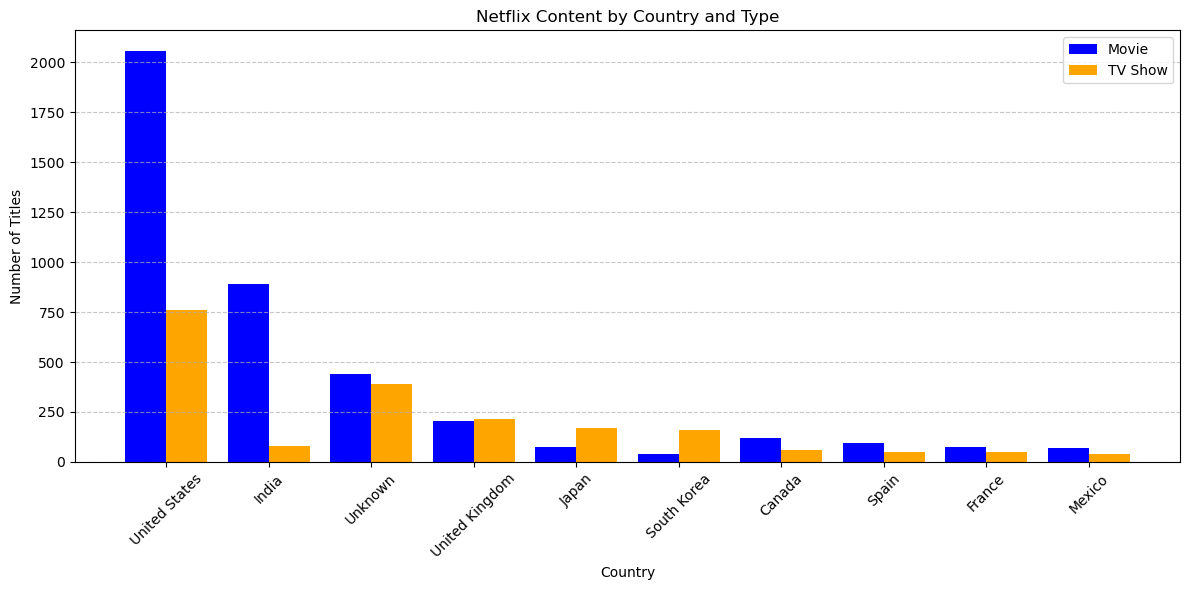

In [15]:
country_type_counts = df.groupby(['country', 'type']).size().unstack(fill_value=0)

top_countries = country_type_counts.sum(axis=1).sort_values(ascending=False).head(10)
top_data = country_type_counts.loc[top_countries.index]

x = np.arange(len(top_data))  
width = 0.4 

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, top_data['Movie'], width, label='Movie', color='blue')
plt.bar(x + width/2, top_data['TV Show'], width, label='TV Show', color='orange')

plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Netflix Content by Country and Type")
plt.xticks(x, top_data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 8. How many Indian titles are on Netflix? What types are they?

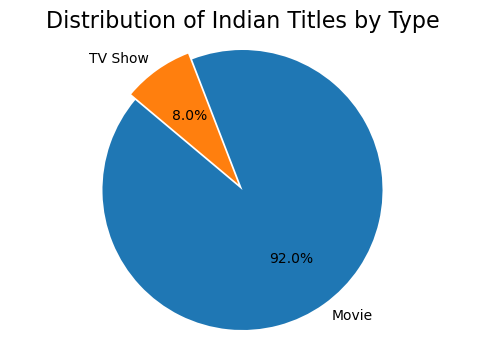

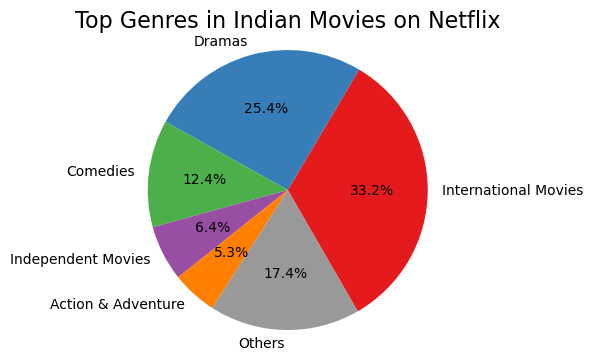

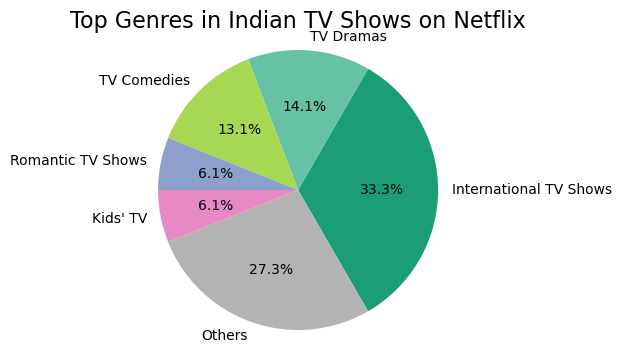

In [16]:
from collections import Counter

indian_titles = df[df['country'].fillna('').str.contains('India')]
indian_movies = indian_titles[indian_titles['type'] == 'Movie']
indian_tv = indian_titles[indian_titles['type'] == 'TV Show']
indian_types = indian_titles['type'].value_counts()

def prepare_pie_data(data):
    genres = data['listed_in'].dropna().str.split(', ')
    flat = [g for sublist in genres for g in sublist]
    counts = Counter(flat)
    
    top5 = counts.most_common(5)
    top5_labels, top5_counts = zip(*top5)
    
    others_count = sum(counts.values()) - sum(top5_counts)
    
    labels = list(top5_labels) + ['Others']
    sizes = list(top5_counts) + [others_count]
    
    return labels, sizes

explode = [0.05, 0]
plt.figure(figsize=(6, 4))
plt.pie(indian_types, labels=indian_types.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Distribution of Indian Titles by Type", fontsize=16)
plt.axis('equal') 
plt.show()

movie_colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#999999']
tv_colors = ['#1B9E77', '#66C2A5', '#A6D854', '#8DA0CB', '#E78AC3', '#B3B3B3']

labels_m, sizes_m = prepare_pie_data(indian_movies)

explode = [0] + [0]*4 + [0]
plt.figure(figsize=(6, 4))
plt.pie(sizes_m, labels=labels_m, autopct='%1.1f%%', startangle=300, explode=explode, colors=movie_colors)
plt.title("Top Genres in Indian Movies on Netflix", fontsize=16)
plt.axis('equal')
plt.show()

labels_tv, sizes_tv = prepare_pie_data(indian_tv)

explode = [0] + [0]*4 + [0]
plt.figure(figsize=(6, 4))
plt.pie(sizes_tv, labels=labels_tv, autopct='%1.1f%%', startangle=300, explode=explode, colors=tv_colors)
plt.title("Top Genres in Indian TV Shows on Netflix", fontsize=16)
plt.axis('equal')
plt.show()

## 9. How many shows/movies are available with unspecified country or cast?

In [17]:
val = df[df['country'] == 'Unknown'].shape[0]
print(f"The number of show/movies with unspecified country are {val}.")

The number of show/movies with unspecified country are 831.


In [18]:
val = df[df['cast'] == 'Not Specified'].shape[0]
print(f"The number of show/movies with unspecified cast are {val}.")

The number of show/movies with unspecified cast are 825.


## 10. What are the top 10 most common genres?

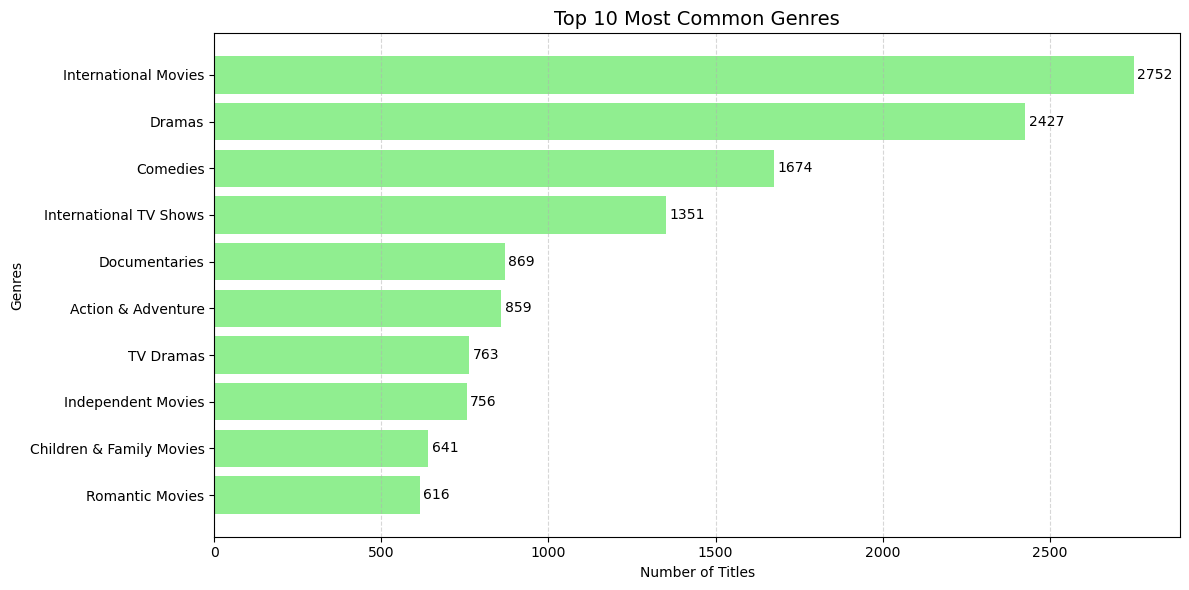

In [19]:
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

genre_counts = Counter(flat_genres)
top_10_genres = genre_counts.most_common(10)

genres, counts = zip(*top_10_genres)
genres = genres[::-1]
counts = counts[::-1]

plt.figure(figsize=(12, 6))
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
bars = plt.barh(genres, counts, color='lightgreen', alpha=1)

for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval + 10, yval, int(xval), va='center', fontsize=10)

plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.title("Top 10 Most Common Genres", fontsize=14)
plt.tight_layout()
plt.show()

## 11. What genres are most frequent in Movies vs TV Shows?

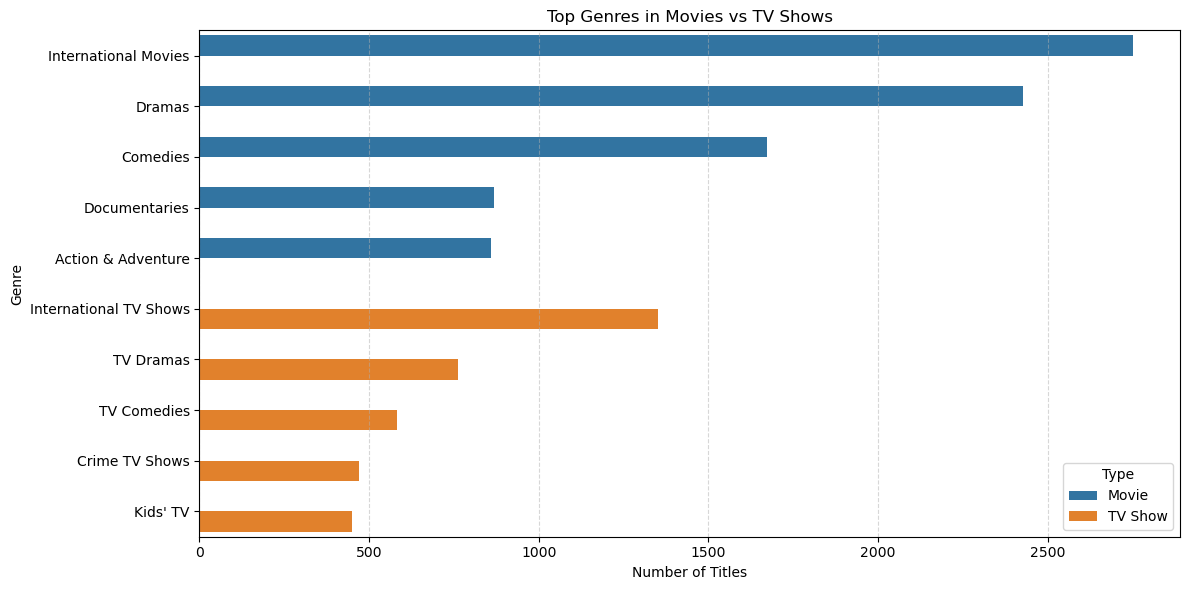

In [20]:
from collections import Counter

def get_top_genres(data, n=5):
    genres = data['listed_in'].dropna().str.split(', ')
    flat_genres = [genre for sublist in genres for genre in sublist]
    return Counter(flat_genres).most_common(n)

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

top_movie_genres = get_top_genres(movies)
top_tv_genres = get_top_genres(tv_shows)

movie_df = pd.DataFrame(top_movie_genres, columns=['Genre', 'Count'])
movie_df['Type'] = 'Movie'

tv_df = pd.DataFrame(top_tv_genres, columns=['Genre', 'Count'])
tv_df['Type'] = 'TV Show'

combined_df = pd.concat([movie_df, tv_df])

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, y='Genre', x='Count', hue='Type')
plt.title('Top Genres in Movies vs TV Shows')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 11. What genres are popular in a specific country (e.g., India or US)?

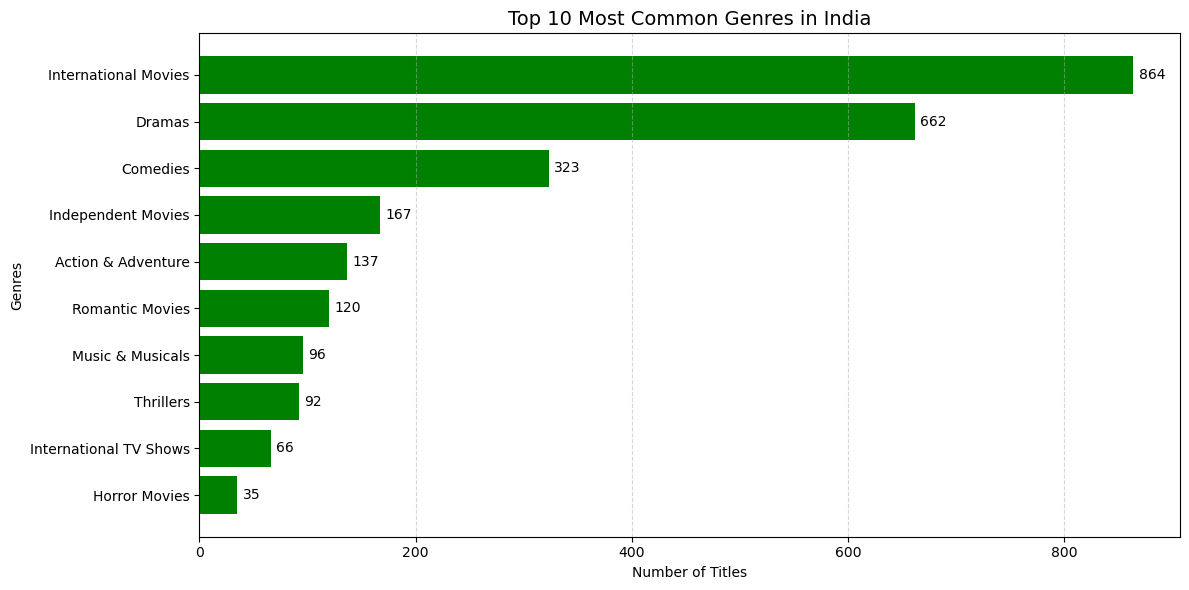

In [21]:
india_df = df[df['country'].str.contains("India", na=False)]
india_genres = india_df['listed_in'].dropna().str.split(', ')

flat_genres = [genre for sublist in india_genres for genre in sublist]
genre_counts = Counter(flat_genres)
top_10_genres = genre_counts.most_common(10)

genres, counts = zip(*top_10_genres)
genres = genres[::-1]
counts = counts[::-1]

plt.figure(figsize=(12, 6))
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
bars = plt.barh(genres, counts, color='green', alpha=1)

for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval + 5, yval, int(xval), va='center', fontsize=10)

plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.title("Top 10 Most Common Genres in India", fontsize=14)
plt.tight_layout()
plt.show()

## 12. Who are the top 10 most frequently appearing actors on Netflix? 

In [22]:
valid_casts = df[(df['cast'].notna()) & (df['cast'] != 'Not Specified')]['cast']

flat_cast = [
    actor.strip()
    for sublist in valid_casts.str.split(', ')
    for actor in sublist
    if actor.strip().lower() != 'unknown'
]

cast_counts = Counter(flat_cast)
top_10_cast = cast_counts.most_common(10)

top_actors_df = pd.DataFrame(top_10_cast, columns=['Actor', 'Number of Titles'])

print("Top 10 Most Frequently Appearing Actors on Netflix:")
top_actors_df

Top 10 Most Frequently Appearing Actors on Netflix:


,Actor,Number of Titles
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


## 13. Which directors have the most titles on Netflix?

In [23]:
valid_directors = df[(df['director'].notna()) & (df['director'] != 'Not Specified')]['director']

flat_director = [
    director.strip()
    for sublist in valid_directors.str.split(', ')
    for director in sublist
    if director.strip().lower() != 'unknown'
]

director_counts = Counter(flat_director)
top_10_director = director_counts.most_common(10)

top_directors_df = pd.DataFrame(top_10_director, columns=['Director', 'Number of Titles'])

print("Top 10 Directors on Netflix:")
top_directors_df

Top 10 Directors on Netflix:


,Director,Number of Titles
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


## 14. What are the most common rating categories (e.g., TV-MA, R, PG)?

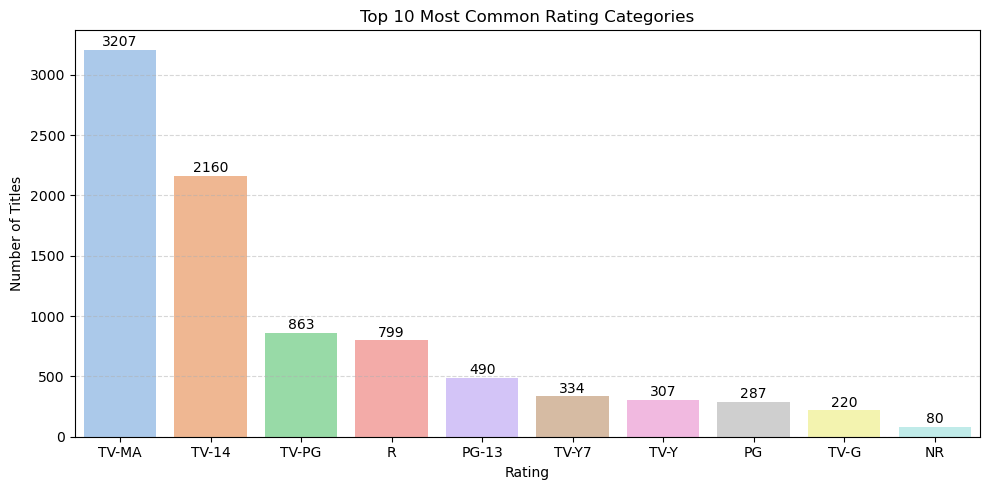

In [24]:
top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='pastel')
plt.title("Top 10 Most Common Rating Categories")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for i, value in enumerate(top_ratings.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()